# Classifiers

## Laboratory 2: Discriminant Analysis

**Team 2:**
- Chowańska Katarzyna
- Urbanek Mateusz

### 1. Load `.csv` files into a DataFrame (2D data structure - basically a table with rows and columns). 

Our first task was to load *CSV* files. Our programming language was Python with Jupyter Notebooks. We loaded the data into a *DataFrame* (2D data structure).

To simplify loading the data, we put the files in GitHub Gists, because Pandas library can download files by URLs.

In [2]:
# URL for data with dataset A (dataset2a.csv)
DATASET_A = r'https://gist.githubusercontent.com/Shanduur/51ebcc9cfff9c085038eb42d72c7f987/raw/847638334436bcfdd24c39e39b9a571ae107852e/cla_l2_d2a.csv'
# URL for data with dataset B (dataset2b.csv)
DATASET_B = r'https://gist.githubusercontent.com/Shanduur/51ebcc9cfff9c085038eb42d72c7f987/raw/847638334436bcfdd24c39e39b9a571ae107852e/cla_l2_d2b.csv'

import pandas as pd

ds1 = pd.read_csv(DATASET_A)
ds2 = pd.read_csv(DATASET_B)

### 2. Check the shape of both data frames. 

Both datasets had shape equal to `(1000, 4)`. It means that both of data frames had 4 columns and 1000 rows.

In [ ]:
print(ds1.shape)
ds1

(1000, 4)


Unnamed: 0         x1         x2  y
0             0  87.855220  31.853029  1
1             1  34.269568  51.388352  0
2             2  22.383606  43.300355  0
3             3   0.221436  78.610820  0
4             4  57.634876  22.137890  1
..          ...        ...        ... ..
995         995   8.005437  51.762977  0
996         996  30.910197  32.506421  0
997         997   6.114791  90.434855  0
998         998  31.727263  31.800762  0
999         999  59.346337  26.886639  1

[1000 rows x 4 columns]

In [ ]:
print(ds2.shape)
ds2

(1000, 4)


Unnamed: 0        x1        x2  y
0             0  1.976766  1.126703  0
1             1  5.507574  5.742863  0
2             2  2.954875  0.342891  0
3             3  6.209933  4.951933  1
4             4  3.484132  7.323132  0
..          ...       ...       ... ..
995         995  9.934264  5.076138  1
996         996  3.377719  2.798833  0
997         997  5.760586  4.352382  1
998         998  1.783370  7.943234  0
999         999  0.696322  9.884954  0

[1000 rows x 4 columns]

### 3. Define a categorical variable (one that has two or more categories, but there is no intrinsic ordering to the categories). 

It was clearly visible from the data, that the last column labeled as `y` should be our categorical variable.

In [ ]:
ds1 = ds1.astype({'y': 'category'})
ds2 = ds2.astype({'y': 'category'})

### 4. Perform basic visualisation of both datasets.

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

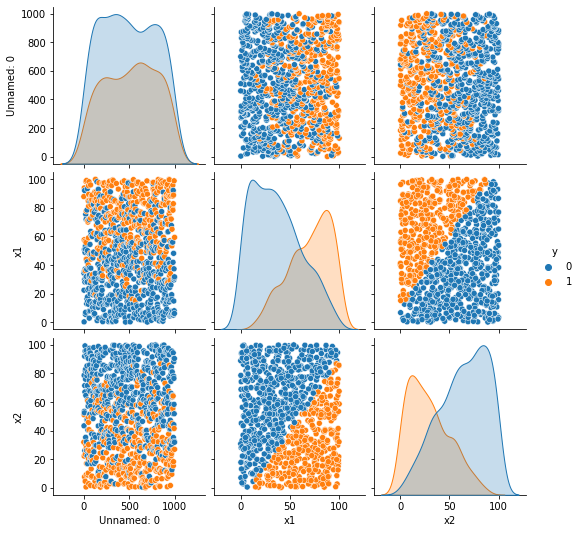

In [ ]:
# pairplot DS1
sb.pairplot(data=ds1, hue='y')

In [ ]:
# pairplot DS2
sb.pairplot(data=ds2, hue='y')

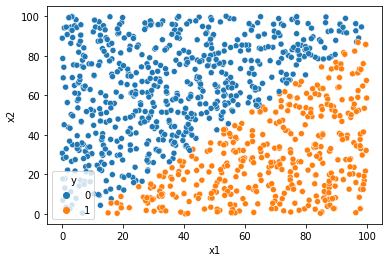

In [ ]:
# scatter plot DS1
sb.scatterplot(data=ds1, x='x1', y='x2', hue='y')

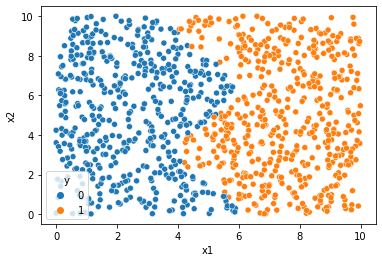

In [ ]:
# scatter plot DS2
sb.scatterplot(data=ds2, x='x1', y='x2', hue='y')

In [ ]:
# box plot DS1
box1=sb.boxplot(data=ds1, order=['x1','x2'])

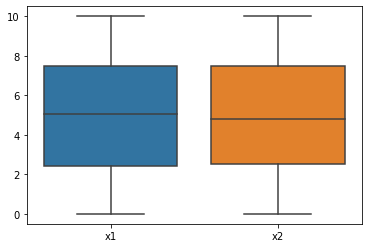

In [ ]:
# box plot DS2
box2=sb.boxplot(data=ds2, order=['x1','x2'])

### 5. Determine which dataset is linearly separable and which is not. 

After evaluation of both datasets and visualising them on the plots, it is clearly visible, espiecially on scatter plots, that only the first data set is linearly separable.

### 6. Split the dataset into training (70%) and test (30%) sets.

With use of *Scikit Learn* library we divided both sets to two parts - test and train.

In [ ]:
from sklearn.model_selection import train_test_split

test_ds1, train_ds1 = train_test_split(ds1, test_size=0.3)
test_ds2, train_ds2 = train_test_split(ds2, test_size=0.3)


### 7. Perform classification using LDA, QDA and SVM techniques on both dataset (fit the model according to the given training data and parameters). 

Using `Scikit Learn` librariy we fit the model to the data using Linear Discriminant Analysis, Quadratic Discriminant Analysis and Support Vector Classification.


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

# LDA
lda = LinearDiscriminantAnalysis()
lda1 = lda.fit(train_ds1, train_ds1['y'])
lda2 = lda.fit(train_ds2, train_ds2['y'])

# QDA
qda = LinearDiscriminantAnalysis()
qda1 = qda.fit(train_ds1, train_ds1['y'])
qda2 = qda.fit(train_ds2, train_ds2['y'])

# SVM
svc = SVC(probability=True)
svc1 = svc.fit(train_ds1, train_ds1['y'])
svc2 = svc.fit(train_ds2, train_ds2['y'])

### 8. Perform classification on an array of test samples. 

After fitting the model to the data, we performed classification of data using the test parts of data sets.

In [ ]:
y_pred11 = lda1.predict(test_ds1)
y_pred12 = qda1.predict(test_ds1)
y_pred13 = svc1.predict(test_ds1)

y_pred21 = lda2.predict(test_ds2)
y_pred22 = qda2.predict(test_ds2)
y_pred23 = svc2.predict(test_ds2)

### 9. Return posterior probabilities of classification.


In [ ]:
prob11 = lda1.predict_proba(test_ds1)
prob12 = qda1.predict_proba(test_ds1)
prob13 = svc1.predict_proba(test_ds1)

prob21 = lda2.predict_proba(test_ds2)
prob22 = qda2.predict_proba(test_ds2)
prob23 = svc2.predict_proba(test_ds2)


### 10. Present the classification results on the test set in the confusion matrix. Return the accuracy score on the given test data and labels. 

Next step was to get accuracy score of the given test data and labels.  

In [ ]:
from sklearn.metrics import confusion_matrix

CM11 = confusion_matrix(test_ds1['y'],y_pred11)
CM12 = confusion_matrix(test_ds1['y'],y_pred12)
CM13 = confusion_matrix(test_ds1['y'],y_pred13)

plt.subplot(1,3,1)
sb.heatmap(CM11, square=True, annot=True, fmt='d', cbar=False)
lda1_score = round(lda1.score(test_ds1, test_ds1['y']),2)
plt.title(lda1_score)

plt.subplot(1,3,2)
sb.heatmap(CM12, square=True, annot=True, fmt='d', cbar=False)
qda1_score = round(qda1.score(test_ds1, test_ds1['y']),2)
plt.title(qda1_score)

plt.subplot(1,3,3)
sb.heatmap(CM13, square=True, annot=True, fmt='d', cbar=False)
svc1_score = round(svc1.score(test_ds1, test_ds1['y']),2)
plt.title(svc1_score)

print("For LDA = ",lda1.score(test_ds1, test_ds1['y']))
print("For QDA = ",qda1.score(test_ds1, test_ds1['y']))
print("For SVM = ",svc1.score(test_ds1, test_ds1['y']))

For LDA =  0.4357142857142857
For QDA =  0.4357142857142857
For SVM =  0.6085714285714285


In [ ]:
from sklearn.metrics import confusion_matrix

CM21 = confusion_matrix(test_ds2['y'],y_pred21)
CM22 = confusion_matrix(test_ds2['y'],y_pred22)
CM23 = confusion_matrix(test_ds2['y'],y_pred23)

plt.subplot(1,3,1)
sb.heatmap(CM21, square=True, annot=True, fmt='d', cbar=False)
lda2_score = round(lda2.score(test_ds2, test_ds2['y']),2)
plt.title(lda2_score)

plt.subplot(1,3,2)
sb.heatmap(CM22, square=True, annot=True, fmt='d', cbar=False)
qda2_score = round(qda2.score(test_ds2, test_ds2['y']),2)
plt.title(qda2_score)

plt.subplot(1,3,3)
sb.heatmap(CM23, square=True, annot=True, fmt='d', cbar=False)
svc2_score = round(svc2.score(test_ds2, test_ds2['y']),2)
plt.title(svc2_score)

print("For LDA = ",lda2.score(test_ds2, test_ds2['y']))
print("For QDA = ",qda2.score(test_ds2, test_ds2['y']))
print("For SVM = ",svc2.score(test_ds2, test_ds2['y']))

For LDA =  0.9228571428571428
For QDA =  0.9228571428571428
For SVM =  0.49142857142857144


### 11. Compare (and describe) the operation of classifiers (LDA, QDA, SVM).

For both datasets there is no significant difference between performace of LDA and QDA method. Both methods performed better for dataset which is not separable linearly.

SVM method worked significantly better then LDA and QDA method for linearly separable dataset and significantly worse for not linearly separable dataset.

### 14. Summary

During this labs we had an opportunity to gain knowledge from the Discriminant Analysis topic. All laboratory assumptions were met. As we can see on the plots, there are clear patterns in the data, that can be extracted with different accuracy using different classification methods.